# Walmart Monthly Sales Analysis and Prediction

### 2.1)Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder , FunctionTransformer , LabelEncoder , PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score ,mean_absolute_percentage_error , accuracy_score
from sklearn.tree import DecisionTreeRegressor ,plot_tree ,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from statsmodels.tsa.seasonal import seasonal_decompose


### 2.2) Loading the Dataset

In [50]:
df= pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### 3.4.1) Removing Outliers of Weekly Sales

In [51]:
print(df["Weekly_Sales"].min())
print(df["Weekly_Sales"].max())
print(df["Weekly_Sales"].std())
print(df["Weekly_Sales"].mean())

percentile25=df["Weekly_Sales"].quantile(0.25)
percentile75=df["Weekly_Sales"].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit_weekly_sales=percentile75 +1.5 * iqr
lower_limit_weekly_sales=percentile75 -1.5 * iqr
print("Upper Limit:",upper_limit_weekly_sales)
print("Lower Limit:",lower_limit_weekly_sales)

print("Weekly Sales Above Upper Limit Data Points",df[df["Weekly_Sales"]>upper_limit_weekly_sales].shape)

print("Weekly Sales Below Lower Limit Data Points",df[df["Weekly_Sales"]<lower_limit_weekly_sales].shape)

df = df[df["Weekly_Sales"] < upper_limit_weekly_sales]



209986.25
3818686.45
564366.6220536975
1046964.8775617715
Upper Limit: 2720371.4924999997
Lower Limit: 119945.8274999999
Weekly Sales Above Upper Limit Data Points (34, 8)
Weekly Sales Below Lower Limit Data Points (0, 8)


In [52]:
monthly_df = df.copy()

# Monthly Data Prediction

In [53]:
monthly_df["Date"]

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6401, dtype: object

In [54]:
monthly_df['Date'] = pd.to_datetime(monthly_df["Date"], format='%d-%m-%Y')


In [55]:
monthly_df["Monthly"] = monthly_df["Date"].dt.to_period("M").dt.to_timestamp()
monthly_df = monthly_df.groupby("Monthly")[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].sum()


In [56]:
monthly_df

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Monthly,,,,,
2010-02-01,1.903330e+08,6531.84,484.554,30210.202611,1551.476
2010-03-01,1.819198e+08,8494.99,501.607,30227.552288,1551.476
2010-04-01,2.314124e+08,12802.81,645.421,37727.648220,1911.985
2010-05-01,1.867109e+08,11765.59,525.123,30175.516368,1529.588
2010-06-01,1.922462e+08,13513.78,501.841,30240.843812,1529.588
2010-07-01,2.325801e+08,17853.19,624.149,37800.367399,1896.430
2010-08-01,1.876401e+08,14205.55,500.940,30278.139478,1517.144
2010-09-01,1.772679e+08,13104.24,492.213,30285.904384,1517.144
2010-10-01,2.171618e+08,13986.43,631.638,37902.074930,1906.940


### Train Test Split

In [57]:
X_monthly = monthly_df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y_monthly = monthly_df["Weekly_Sales"]

# Split into train and test sets
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly, test_size=0.2, random_state=4)


In [58]:
y_train_monthly

Monthly
2010-04-01    2.314124e+08
2011-12-01    2.561746e+08
2011-07-01    2.299114e+08
2011-10-01    1.832613e+08
2012-04-01    1.889209e+08
2012-02-01    1.920636e+08
2012-10-01    1.843617e+08
2012-03-01    2.315097e+08
2010-02-01    1.903330e+08
2010-05-01    1.867109e+08
2010-12-01    2.416699e+08
2010-08-01    1.876401e+08
2011-02-01    1.863313e+08
2012-05-01    1.887665e+08
2010-06-01    1.922462e+08
2012-06-01    2.406103e+08
2012-07-01    1.875095e+08
2011-03-01    1.793564e+08
2010-09-01    1.772679e+08
2010-11-01    1.886242e+08
2011-08-01    1.885993e+08
2012-08-01    2.368508e+08
2012-01-01    1.688945e+08
2010-10-01    2.171618e+08
2010-03-01    1.819198e+08
2010-07-01    2.325801e+08
Name: Weekly_Sales, dtype: float64

## Transformation

In [59]:
trf = FunctionTransformer( func = np.log1p , validate = True)

In [60]:
X_train_trans_monthly = trf.fit_transform(X_train_monthly)
X_test_trans_monthly = trf.transform(X_test_monthly)
y_train_trans_monthly = trf.fit_transform(y_train_monthly.values.reshape(-1, 1))
y_test_trans_monthly = trf.transform(y_test_monthly.values.reshape(-1, 1))

## Scaling

In [61]:
scaler = StandardScaler()

# Scale the features
X_train_scaled_monthly = scaler.fit_transform(X_train_trans_monthly)
X_test_scaled_monthly = scaler.transform(X_test_trans_monthly)

# Scale the target
y_train_scaled_monthly = scaler.fit_transform(y_train_trans_monthly)
y_test_scaled_monthly = scaler.transform(y_test_trans_monthly)

### Linear Regression

In [62]:
lr1 = LinearRegression()
lr1.fit(X_train_scaled_monthly, y_train_scaled_monthly)  # Ensure you use the correct training data

y_pred1 = lr1.predict(X_test_scaled_monthly)  # Predict using the scaled test data

# Inverse scaling and transformation
y_test_inv_trans = scaler.inverse_transform(y_test_scaled_monthly)  # Use scaler_y for y values
y_pred1_inv_trans = scaler.inverse_transform(y_pred1.reshape(-1, 1))  # Ensure predictions are reshaped

y_test_inv = np.expm1(y_test_inv_trans)  # Inverse log transformation
y_pred1_inv = np.expm1(y_pred1_inv_trans)  # Inverse log transformation

# Evaluation
mape_lr = mean_absolute_percentage_error(y_test_inv, y_pred1_inv) * 100
print("Linear Regression MAPE Score:", mape_lr)

mae_lr = mean_absolute_error(y_test_inv, y_pred1_inv)
print("Linear Regression MAE:", mae_lr)

# Create DataFrame for comparison
results_df = pd.DataFrame({
    'Actual Weekly Sales': y_test_inv.flatten(),
    'Predicted Weekly Sales': y_pred1_inv.flatten()
})

# Display the first few rows of the results DataFrame
print("\nComparison of Actual and Predicted Weekly Sales:")
results_df.head(10)# Display the first 10 rows

Linear Regression MAPE Score: 5.966403663336792
Linear Regression MAE: 11356506.8996662

Comparison of Actual and Predicted Weekly Sales:


,Actual Weekly Sales,Predicted Weekly Sales
0,1.897734e+08,1.844864e+08
1,1.984371e+08,1.839737e+08
2,2.265265e+08,2.372963e+08
3,1.806455e+08,1.852056e+08
4,1.816482e+08,1.855424e+08
5,2.208477e+08,2.365692e+08
6,1.637040e+08,1.885037e+08


### Decision Tree

In [63]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=3, min_samples_leaf=2)
dt.fit(X_train_scaled_monthly, y_train_scaled_monthly)

# Predict on the test data
y_pred_dt = dt.predict(X_test_scaled_monthly)

# Inverse scaling and transformation
# Assuming scaler_y is used for scaling the target variable (y)
y_test_inv_trans = scaler.inverse_transform(y_test_scaled_monthly)
y_pred_dt_inv_trans = scaler.inverse_transform(y_pred_dt.reshape(-1, 1))  # Reshape for inverse transform

y_test_inv = np.expm1(y_test_inv_trans)  # Inverse log transformation
y_pred_dt_inv = np.expm1(y_pred_dt_inv_trans)  # Inverse log transformation

# Evaluation


mape_dt = mean_absolute_percentage_error(y_test_inv, y_pred_dt_inv) * 100
print("Decision Tree MAPE Score:", mape_dt)

mae_dt = mean_absolute_error(y_test_inv, y_pred_dt_inv)
print("Decision Tree MAE:", mae_dt)

# Create DataFrame for comparison
results_df_dt = pd.DataFrame({
    'Actual Weekly Sales': y_test_inv.flatten(),
    'Predicted Weekly Sales': y_pred_dt_inv.flatten()
})

# Display the first few rows of the results DataFrame
print("\nDecision Tree Comparison of Actual and Predicted Weekly Sales:")
results_df_dt.head(10)  # Display the first 10 rows


Decision Tree MAPE Score: 4.484864842332085
Decision Tree MAE: 8347853.3710078895

Decision Tree Comparison of Actual and Predicted Weekly Sales:


,Actual Weekly Sales,Predicted Weekly Sales
0,1.897734e+08,1.898549e+08
1,1.984371e+08,1.803255e+08
2,2.265265e+08,2.284412e+08
3,1.806455e+08,1.865511e+08
4,1.816482e+08,1.898549e+08
5,2.208477e+08,2.284412e+08
6,1.637040e+08,1.803255e+08


In [79]:
y_test_scaled

array([[-1.2480911 ],
       [-1.05116769],
       [-0.97156854],
       ...,
       [-0.44275287],
       [-0.48147682],
       [-0.38328722]])

### KNN

In [67]:
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_monthly, y_train_monthly)

# Predict on test data
y_pred_knn = knn.predict(X_test_monthly)

# Compute the evaluation metrics
mape_knn = mean_absolute_percentage_error(y_test_monthly, y_pred_knn) * 100
print("KNN MAPE Score:", mape_knn)

mae_knn = mean_absolute_error(y_test_monthly, y_pred_knn)
print("KNN MAE:", mae_knn)

# Create DataFrame for comparison
results_df_knn = pd.DataFrame({
    'Actual Weekly Sales': y_test_monthly.values,
    'Predicted Weekly Sales': y_pred_knn
})

# Display the first few rows of the results DataFrame
print("\nKNN Comparison of Actual and Predicted Weekly Sales:")
print(results_df_knn.head(10))

KNN MAPE Score: 5.210927682871409
KNN MAE: 9879126.292000009

KNN Comparison of Actual and Predicted Weekly Sales:
   Actual Weekly Sales  Predicted Weekly Sales
0         1.897734e+08            1.866526e+08
1         1.984371e+08            1.821717e+08
2         2.265265e+08            2.353737e+08
3         1.806455e+08            1.860303e+08
4         1.816482e+08            1.864043e+08
5         2.208477e+08            2.314229e+08
6         1.637040e+08            1.839084e+08


In [73]:
knn = KNeighborsRegressor(n_neighbors=5)

# Train the KNN model
knn.fit(X_train_scaled_monthly, y_train_scaled_monthly)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled_monthly)

# Evaluation

y_test_inv_trans = scaler.inverse_transform(y_test_scaled_monthly)
y_pred_knn_inv_trans = scaler.inverse_transform(y_pred_knn.reshape(-1, 1))

y_test_inv = np.expm1(y_test_inv_trans)  # Inverse log transformation
y_pred_knn_inv = np.expm1(y_pred_knn_inv_trans)


mape_knn = mean_absolute_percentage_error(y_test_inv, y_pred_knn_inv) * 100
print("MAPE Score:", mape_knn)

mae_knn = mean_absolute_error(y_test_inv, y_pred_knn_inv)
print("MAE:", mae_knn)

# Print the results
results_df = pd.DataFrame({
    'Actual Weekly Sales': y_test_inv.flatten(),
    'Predicted Weekly Sales': y_pred_knn_inv.flatten()
})

print(results_df.head())

MAPE Score: 5.193175110491217
MAE: 9893360.783071479
   Actual Weekly Sales  Predicted Weekly Sales
0         1.897734e+08            1.873992e+08
1         1.984371e+08            1.818138e+08
2         2.265265e+08            2.340243e+08
3         1.806455e+08            1.865494e+08
4         1.816482e+08            1.857405e+08


# Graphical Comparison

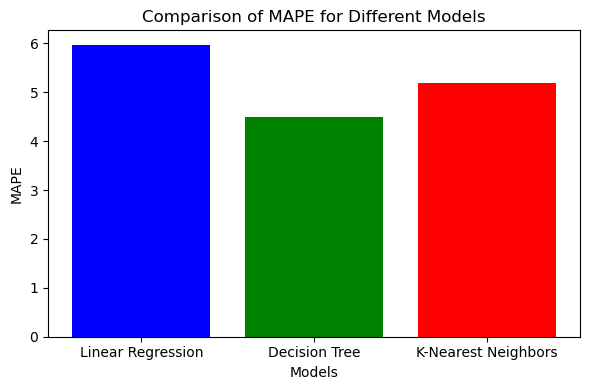

In [74]:
models = ['Linear Regression', 'Decision Tree', 'K-Nearest Neighbors']
mape_scores = [mape_lr, mape_dt, mape_knn]
# Plotting the R2 scores
plt.figure(figsize=(6, 4))
plt.bar(models, mape_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('Comparison of MAPE for Different Models')

plt.tight_layout()
plt.show()